In [1]:
import pandas as pd


In [14]:
data=pd.read_csv('clean_data.csv')
data.head()

,age,bp,pcc,bgr,sod,pot,hemo,pcv,wc,rc,...,classification,SG_category,AL_category,SU_category,RBC_category,PC_category,BA_category,BU_category,PE_category,SC_category
0,-0.212673,0.391532,0,-0.347722,-0.111144,0.302593,1.064621,0.645817,-0.228581,0.685556,...,0,0,0,1,1,1,0,0,1,1
1,-2.544153,-1.894959,0,0.240394,-0.111144,0.302593,-0.457824,-0.073962,-0.950986,-0.757638,...,0,0,0,1,1,1,0,1,1,1
2,0.624269,0.391532,0,1.881924,-0.111144,0.302593,-1.089082,-0.913705,-0.348981,-0.757638,...,0,0,0,0,1,1,0,0,1,0
3,-0.212673,-0.523064,1,-0.434732,-2.296809,-2.540136,-0.494957,-0.793742,-0.670050,-0.654553,...,0,0,0,1,1,0,0,0,0,0
4,-0.033328,0.391532,0,-0.674012,-0.111144,0.302593,-0.346426,-0.433852,-0.429249,0.067044,...,0,0,0,1,1,1,0,0,1,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   pcc             400 non-null    int64  
 3   bgr             400 non-null    float64
 4   sod             400 non-null    float64
 5   pot             400 non-null    float64
 6   hemo            400 non-null    float64
 7   pcv             400 non-null    float64
 8   wc              400 non-null    float64
 9   rc              400 non-null    float64
 10  htn             400 non-null    int64  
 11  ane             400 non-null    int64  
 12  classification  400 non-null    int64  
 13  SG_category     400 non-null    int64  
 14  AL_category     400 non-null    int64  
 15  SU_category     400 non-null    int64  
 16  RBC_category    400 non-null    int64  
 17  PC_category     400 non-null    int

Logistic Regression: Accuracy = 0.9750, Training Time = 0.0030 seconds
SVC: Accuracy = 0.9625, Training Time = 0.0000 seconds
Random Forest: Accuracy = 0.9875, Training Time = 0.2014 seconds
Gradient Boosting: Accuracy = 0.9875, Training Time = 0.1919 seconds


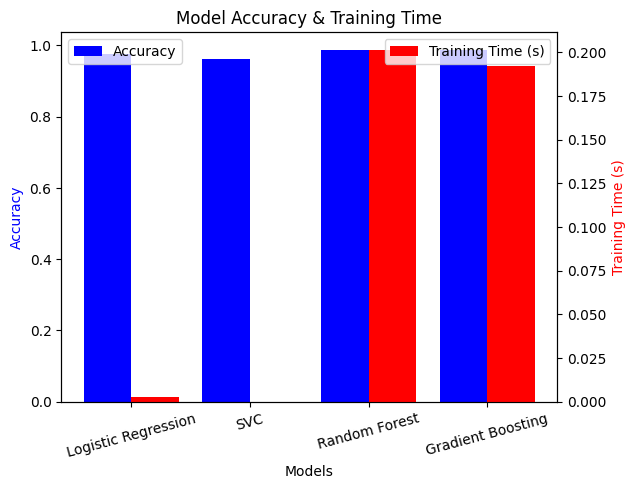

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Load your dataset
df = pd.read_csv("clean_data.csv")  # Replace with your actual file path

# Separate features (X) and target (y)
data = df.drop(columns='classification')  # All columns except the last one as features
target =  df ['classification'] # The last column as the target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data , target , test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

accuracies = []
times = []

# Train and evaluate models
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    accuracies.append(acc)
    times.append(end_time - start_time)
    
    print(f'{name}: Accuracy = {acc:.4f}, Training Time = {end_time - start_time:.4f} seconds')

# Visualization
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x_labels = list(models.keys())
x = np.arange(len(models))
ax1.bar(x - 0.2, accuracies, 0.4, label='Accuracy', color='b')
ax2.bar(x + 0.2, times, 0.4, label='Training Time (s)', color='r')

ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color='b')
ax2.set_ylabel('Training Time (s)', color='r')
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=15)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Model Accuracy & Training Time')
plt.show()
